# Challenge 5
This bonus challenge checks your ability to create effective visuals using matplotlib.
The below cell contains some essential pre-processing.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tariff_data = pd.read_csv('./data/Tariff Calculations plus Population.csv', delimiter=";")
tariff_data.columns = tariff_data.columns.str.strip().str.lower().str.replace(' ', '_')

cols_to_convert = ['us_2024_deficit', 'us_2024_exports', 'us_2024_imports_(customs_basis)']
for col in cols_to_convert:
    tariff_data[col] = tariff_data[col].astype(str).str.replace(',', '', regex= False)

cols_to_convert = ['trump_tariffs_alleged', 'trump_response']
for col in cols_to_convert:
    tariff_data[col] = tariff_data[col].astype(str).str.replace('%', '').astype(float)/100

tariff_data['us_2024_deficit'] = tariff_data['us_2024_deficit'].astype(float)
tariff_data['us_2024_exports'] = tariff_data['us_2024_exports'].astype(float)
tariff_data['us_2024_imports_(customs_basis)'] = tariff_data['us_2024_imports_(customs_basis)'].astype(float)
tariff_data['trump_tariffs_alleged'] = tariff_data['trump_tariffs_alleged'].astype(float)
tariff_data['trump_response'] = tariff_data['trump_response'].astype(float)
tariff_data['population'] = tariff_data['population'].astype(float)

## Task 1
Create a pie chart showing the share of total US exports accounted for by the top 5 countries.

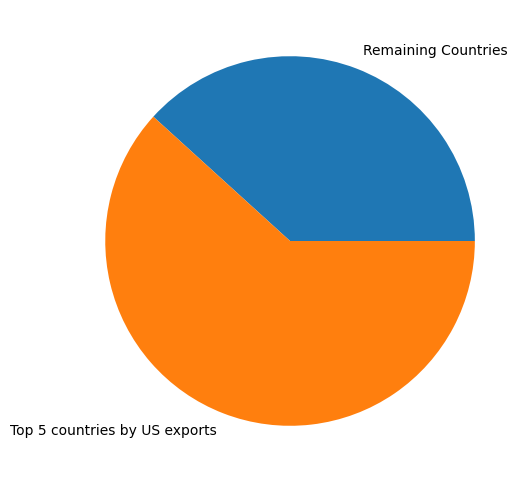

In [9]:
fig = plt.figure(figsize=(6, 6))

sorted_df = tariff_data['us_2024_exports'].sort_values(ascending=False)
top_5 = sorted_df.head(5).sum()
remaining = tariff_data['us_2024_exports'].sum() - sorted_df.head(5).sum()

plt.pie(
    [remaining, top_5], 
    labels= ['Remaining Countries', 'Top 5 countries by US exports']
)

plt.show()

## Task 2
Create a horizontal bar chart comparing `us_2024_exports` and `us_2024_imports_customs_basis` for the top 10 countries by total trade volume.

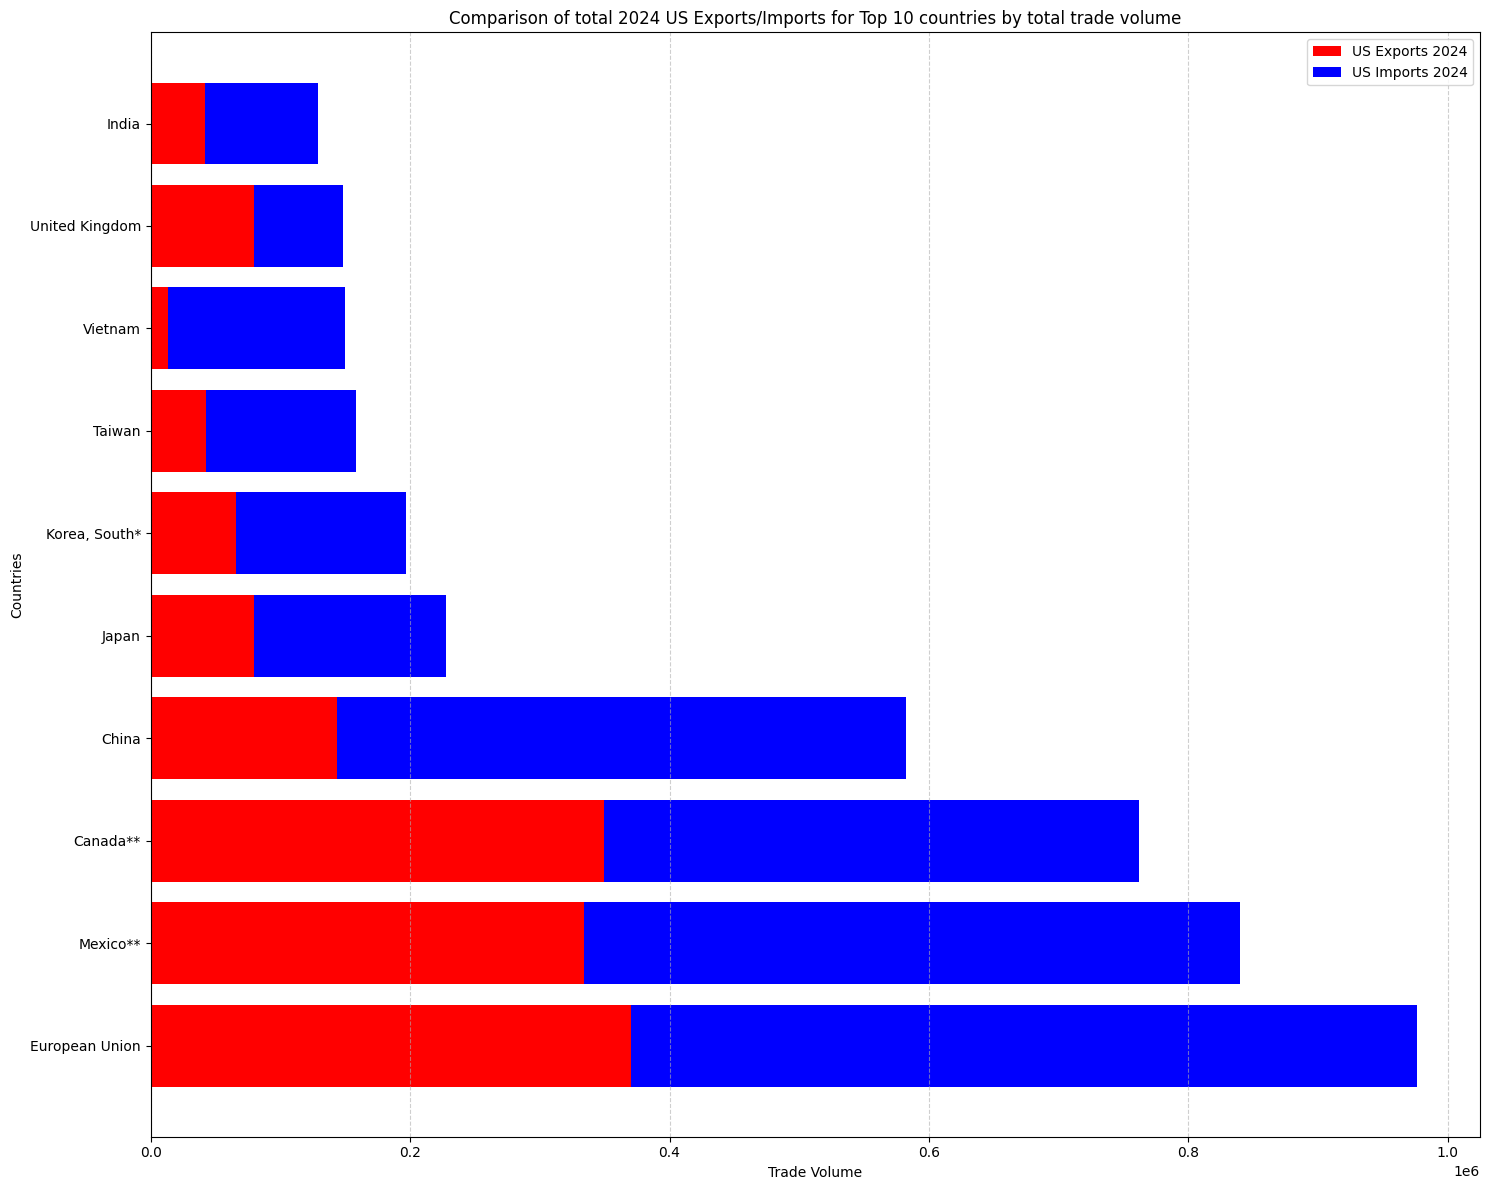

In [60]:

tariff_data['total_trade_volume'] = tariff_data['us_2024_exports'] + tariff_data['us_2024_imports_(customs_basis)']
tariff_data = tariff_data.sort_values(by= 'total_trade_volume', ascending= False)

plt.figure(figsize= (15,12))
plt.barh(tariff_data['country'].head(10), tariff_data['us_2024_exports'].head(10), color='red', label= 'US Exports 2024')
plt.barh(tariff_data['country'].head(10), tariff_data['us_2024_imports_(customs_basis)'].head(10), left= tariff_data['us_2024_exports'].head(10),color= 'blue', label= 'US Imports 2024')
plt.legend()
plt.title('Comparison of total 2024 US Exports/Imports for Top 10 countries by total trade volume')
plt.ylabel('Countries')
plt.xlabel('Trade Volume')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)


## Task 3
Customize your plots with titles, axis labels, and legends to make them presentation-ready.
Will be done above.